## binomial distribuition

In [2]:
from scipy.stats import binom
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
n = 5
k = 3
p = 0.66
probability = binom.pmf(k, n, p)
print(f"The probability that exactly {k} out of {n} student like Python is: {probability: .4f}")


The probability that exactly 3 out of 5 student like Python is:  0.3323


In [4]:
n = 7
k = 2
p = 0.55
probability = binom.pmf(k, n, p)
print(f"The probability that exactly {k} out of {n} student preffering online learning over offline: {probability: .4f}")


The probability that exactly 2 out of 7 student preffering online learning over offline:  0.1172


In [5]:
tips_df=sns.load_dataset('tips')
tips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [6]:
def classify_tip(row):
    total_bill=row['total_bill']
    tip=row['tip']
    if(tip/total_bill)>0.15:
        return 1
    else:
        return 0
#Apply the function to create the binary column
tips_df['tip_binary']=tips_df.apply(classify_tip,axis=1)

#total no of trails
n=len(tips_df)
#Number of successes(tips where tip/total_bill>0.15)
k=tips_df['tip_binary'].sum()
#Probabilty of success(p)
p=k/n

#Define number of trials for the binomial distribution
trials=100
x=np.arange(0,trials+1)

#Calculate the PMF for each number of successes
pmf_values=binom.pmf(x,trials,p)
cumulative_probability=0

for i in x:
    cumulative_probability=binom.cdf(i,trials,p)
    print(f'Probability for {i} successes= {pmf_values[i]:.6f}... Cumulative probability ={cumulative_probability:.6f}')
    # i.e probabiliy of exactly i customer paying tip greater than 15percent out of 100

Probability for 0 successes= 0.000000... Cumulative probability =0.000000
Probability for 1 successes= 0.000000... Cumulative probability =0.000000
Probability for 2 successes= 0.000000... Cumulative probability =0.000000
Probability for 3 successes= 0.000000... Cumulative probability =0.000000
Probability for 4 successes= 0.000000... Cumulative probability =0.000000
Probability for 5 successes= 0.000000... Cumulative probability =0.000000
Probability for 6 successes= 0.000000... Cumulative probability =0.000000
Probability for 7 successes= 0.000000... Cumulative probability =0.000000
Probability for 8 successes= 0.000000... Cumulative probability =0.000000
Probability for 9 successes= 0.000000... Cumulative probability =0.000000
Probability for 10 successes= 0.000000... Cumulative probability =0.000000
Probability for 11 successes= 0.000000... Cumulative probability =0.000000
Probability for 12 successes= 0.000000... Cumulative probability =0.000000
Probability for 13 successes= 0.000

([<matplotlib.axis.XTick at 0x14bba5ff7a0>,
 [Text(0, 0, '0'),
  Text(5, 0, '5'),
  Text(10, 0, '10'),
  Text(15, 0, '15'),
  Text(20, 0, '20'),
  Text(25, 0, '25'),
  Text(30, 0, '30'),
  Text(35, 0, '35'),
  Text(40, 0, '40'),
  Text(45, 0, '45'),
  Text(50, 0, '50'),
  Text(55, 0, '55'),
  Text(60, 0, '60'),
  Text(65, 0, '65'),
  Text(70, 0, '70'),
  Text(75, 0, '75'),
  Text(80, 0, '80'),
  Text(85, 0, '85'),
  Text(90, 0, '90'),
  Text(95, 0, '95')])

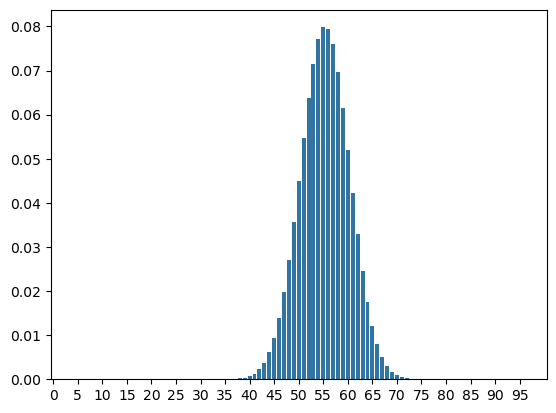

In [7]:
import matplotlib.pyplot as plt
sns.barplot(x = np.arange(0,trials+1),y = pmf_values)
plt.xticks(np.arange(0,100,5))

## poisson distribution

## normal distribution

In [10]:
import scipy.stats as stats
from scipy.stats import zscore

In [11]:
df = pd.read_csv('diabetes.csv')

In [12]:
# calculate mean and standard deviation of the glucose column
glucose_mean = df['Glucose'].mean()
glucose_std = df['Glucose'].std()


In [13]:
# calculate z score for glucose level of 168(using manual method)
glucose_value = 168
z_score_168_manual = (glucose_value - glucose_mean ) / glucose_std
print(f"Z-score for glucose level of 168: {z_score_168_manual}")

Z-score for glucose level of 168: 1.4733065794769926


In [14]:
# calculate z-score using method
df['Glucose_zscore'] = zscore(df['Glucose'])
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose_zscore
0,6,148,72,35,0,33.6,0.627,50,1,0.848324
1,1,85,66,29,0,26.6,0.351,31,0,-1.123396
2,8,183,64,0,0,23.3,0.672,32,1,1.943724
3,1,89,66,23,94,28.1,0.167,21,0,-0.998208
4,0,137,40,35,168,43.1,2.288,33,1,0.504055
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,-0.622642
764,2,122,70,27,0,36.8,0.340,27,0,0.034598
765,5,121,72,23,112,26.2,0.245,30,0,0.003301
766,1,126,60,0,0,30.1,0.349,47,1,0.159787


In [15]:
# find the row index where glucose = 168


row_index = df[df['Glucose'] == glucose_value].index

In [16]:
# now we will extract first row from Glucose_xscore where glucose = 168
z_score_168_using_function = df['Glucose_zscore'].iloc[row_index[0]]

print(f"Z-score for glucose level of 168 (using zscore function): {z_score_168_using_function}")

Z-score for glucose level of 168 (using zscore function): 1.4742667011686503


In [17]:
# calculate the percentile for this z-score
percentile_168 = stats.norm.cdf(z_score_168_manual) * 100
print(f"percentile for glucose level of 168: {percentile_168}%")

percentile for glucose level of 168: 92.96658063066623%


- ppf is used to find zscore from percentile

In [19]:
# find the z_score at the 30th percentile
z_score_30 = stats.norm.ppf(0.30)
print(f'Z-score at the 30th percentile:{z_score_30}')


Z-score at the 30th percentile:-0.5244005127080409


In [20]:
#Calculate the corresponding Glucose value for the z-score of the 30th percentile
glucose_value_30=glucose_mean+z_score_30*glucose_std
print(f'Glucose value corresponding to 3oth percentile: {glucose_value_30}')

Glucose value corresponding to 3oth percentile: 104.12807387585212


In [21]:
#Given z-score of 2.8, calculate the corresponding Glucose level
z_score_given=2.8
glucose_value_given=glucose_mean + z_score_given*glucose_std
print(f'Glucose value for z-score of 2.8: {glucose_value_given}')

Glucose value for z-score of 2.8: 210.4178621963814


In [22]:
#Calculate the percentile for the z-score of 2.8
percentile_given=stats.norm.cdf(z_score_given)*100         #multiply by 100 to get percentile
print(f'Percentage for z-score of 2.8: {percentile_given}%')

Percentage for z-score of 2.8: 99.7444869669572%


### another example

In [24]:
data = tips_df

In [25]:
import matplotlib.pyplot as plt

In [26]:
total_bill_series = data['total_bill']
print(total_bill_series.head())

0    16.99
1    10.34
2    21.01
3    23.68
4    24.59
Name: total_bill, dtype: float64


In [27]:
# calculating mean and standarrd deviaation
mu, std = total_bill_series.mean(), total_bill_series.std()

In [28]:
# calculating zscore for each value
z_scores = (total_bill_series - mu)/std

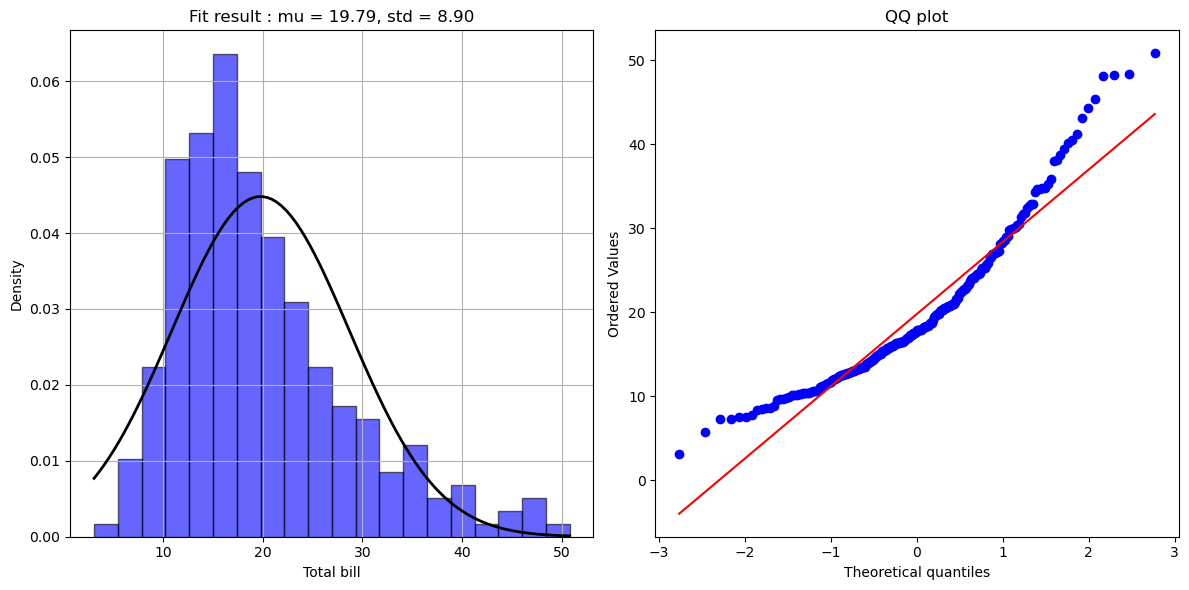

In [29]:
# plot normal distribution graph of total_bill
plt.figure(figsize = (12,6))
plt.subplot(1, 2, 1)
plt.hist(total_bill_series, bins = 20, density = True, alpha = 0.6 ,color = 'b', edgecolor = 'black')
# fit the normal distribution to the data
x = np.linspace(total_bill_series.min(), total_bill_series.max(), 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x,p, 'k', linewidth = 2) # here k is color
title = 'Fit result : mu = %.2f, std = %.2f' %(mu, std)
plt.title(title)
plt.xlabel('Total bill')
plt.ylabel('Density')
plt.grid(True)

## QQ plot
plt.subplot(1,2,2)
stats.probplot(total_bill_series, dist = 'norm', plot = plt)
plt.title('QQ plot')
plt.tight_layout()
plt.show()

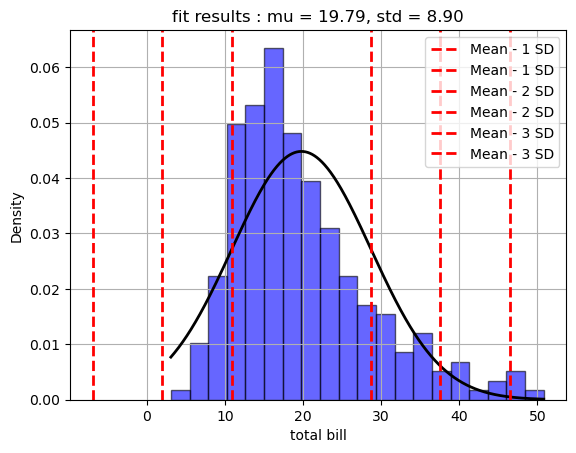

In [30]:
# plot graph showing mean +- 3SD
plt.figure(figure = (10, 6))
plt.hist(total_bill_series, bins = 20, density = True, alpha = 0.6, color = 'b', edgecolor = 'black')

# fitting normal distribution to data
x = np.linspace(total_bill_series.min(), total_bill_series.max(), 1000)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth = 2)
title = f"fit results : mu = {mu:.2f}, std = {std:.2f}"
plt.title(title)
plt.xlabel("total bill")
plt.ylabel("Density")
plt.grid(True)

# ploting mean +- 3Standard deviation
for i in  range(1,4):
    plt.axvline(mu - i*std, color = 'r', ls = '--', lw = 2, label = f'Mean - {i} SD')
    plt.axvline(mu + i*std, color = 'r', ls = '--', lw = 2, label = f'Mean - {i} SD')
plt.legend()
plt.show()
    

In [31]:
# check if the mean +- 1sd. mean +- 2sd, mean+- 3sd satisfy the emperical rule
within_1sd = (z_scores <= 1) & (z_scores >= -1)
within_2sd = (z_scores <= 2) & (z_scores >= -2)
within_3sd = (z_scores <= 3) & (z_scores >= -3)

In [32]:
percentage_within_1sd = np.sum(within_1sd) / len(total_bill_series) * 100
percentage_within_2sd = np.sum(within_2sd) / len(total_bill_series) * 100
percentage_within_3sd = np.sum(within_3sd) / len(total_bill_series) * 100

In [33]:
print(f"Percentage of data within mean ± 1 SD: {percentage_within_1sd:.2f}%")
print(f"Percentage of data within mean ± 2 SD: {percentage_within_2sd:.2f}%")
print(f"Percentage of data within mean ± 3 SD: {percentage_within_3sd:.2f}%")

Percentage of data within mean ± 1 SD: 72.13%
Percentage of data within mean ± 2 SD: 94.26%
Percentage of data within mean ± 3 SD: 98.36%


In [34]:
# create dataframe to score total_bill, z-score, and within_1sd, witin_2d, within_3rs flags
result_df = pd.DataFrame({'total_bill':total_bill_series, 'z-score':z_scores,'within_1sd': within_1sd,'within_2sd': within_2sd,'within_3sd': within_3sd})
result_df.head()

,total_bill,z-score,within_1sd,within_2sd,within_3sd
0,16.99,-0.314066,True,True,True
1,10.34,-1.061054,False,True,True
2,21.01,0.137497,True,True,True
3,23.68,0.437416,True,True,True
4,24.59,0.539635,True,True,True


In [35]:
import os
if os.path.exists('deletethis-2.csv'):
    os.remove('deletethis-2.csv') # Remove the file if it exits

result_df.to_csv('deletethis-2.csv',index=False)

In [36]:
# Fliter outliers
# outliers=reult_df[(result_df['z_score']<-3) | (result_df['z_score']>3]
# Outlier z-score box plot
import seaborn as sns

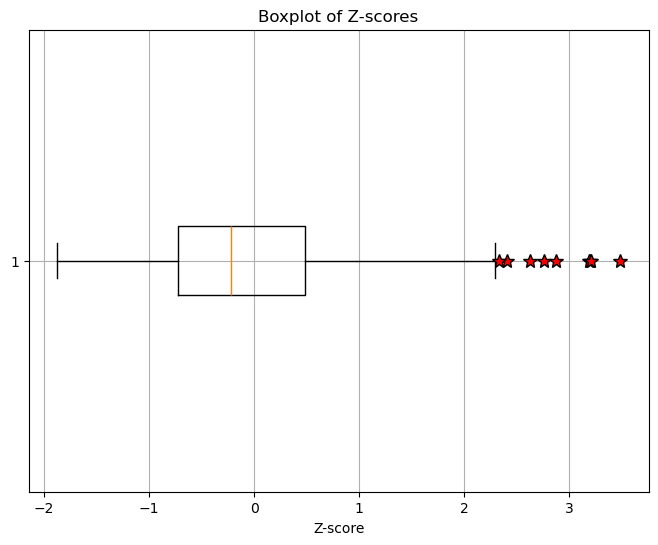

In [37]:
plt.figure(figsize=(8,6))
# vert = False indicate that the graph will be drawn hrizontally
# marker = "*" : sets the marrker style

plt.boxplot(result_df['z-score'],vert=False,flierprops=dict(marker='*',markerfacecolor='red',markersize=10))

plt.xlabel('Z-score')
plt.title('Boxplot of Z-scores')
plt.grid(True)
plt.show()

####  Central Limit Theorem (Normal Distribution)

In [73]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [75]:
#Shapiro test on Glucos column
shapiro_test=stats.shapiro(df['Glucose'])
print('Shapiro-Wilk p-value:', shapiro_test.pvalue)

Shapiro-Wilk p-value: 1.9863474999979633e-11


In [79]:
if shapiro_test.pvalue<0.05:
    print("The data likely does not follow a normal distribution.")
else:
    print("The data may be normally distributed, but the q-q plot can provide further insights.")

The data likely does not follow a normal distribution.


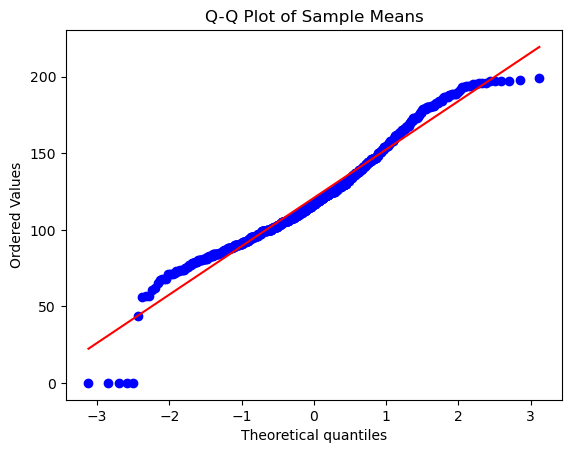

In [81]:
#Generate a Q-Q plot for the sample means
stats.probplot(df['Glucose'],dist='norm',plot=plt)
plt.title('Q-Q Plot of Sample Means')
plt.show()

In [89]:
# Central Limit Theorem
sample_means=[]
n_samples=100
sample_size=30

for _ in range(n_samples):
    sample=df['Glucose'].sample(n=sample_size,replace=True)
    sample_means.append(sample.mean())

In [105]:
sample_means.

100

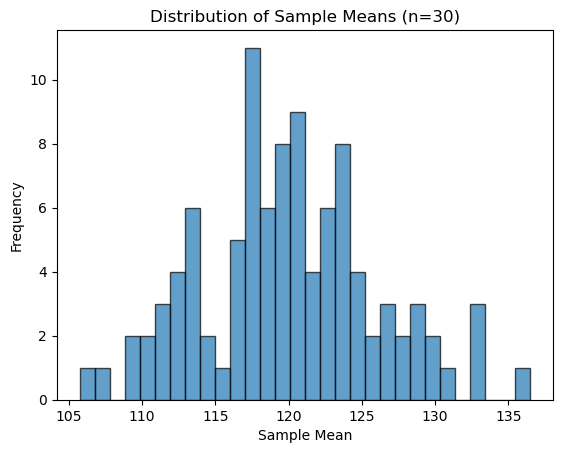

In [109]:
# Plot the distribution of sample means
plt.hist(sample_means, bins=30,edgecolor='k',alpha=0.7)
plt.title("Distribution of Sample Means (n=30)")
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.show()

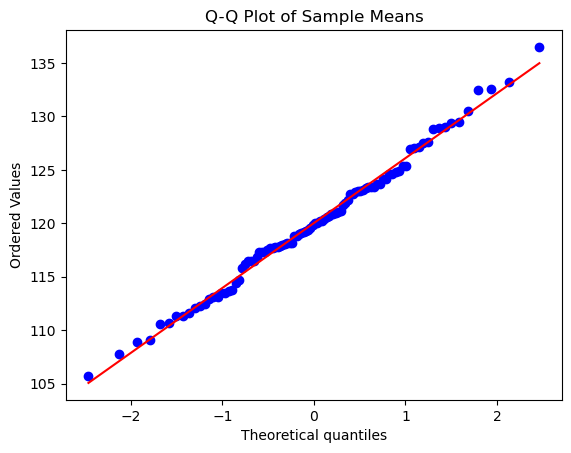

In [93]:
#Generate a Q-Q plot for the sample means
stats.probplot(sample_means,dist='norm',plot=plt)
plt.title('Q-Q Plot of Sample Means')
plt.show()